Student: Joshua Kingsbury  
Date: 2/1/22

## Exoplanet Discovery Methods - Transit Photometry

In the search for understanding our the solar system, and our place in the universe we live in, a valuable avenue for research has been the study of extra-solar planets. The first two confirmed exoplanets were discovered in 1992, due to discrepancies in pulsar timings observed using the Arecibo observatory. As of the writing of this document, over 4,908 confirmed exoplanets have been discovered using 11 different discovery methods. [2] We'll be taking a look at one of the most fruitful methods to date, transit photometry.

Transit photometry is the study of variations in the lightcurve observed from a star. As a planet passes in front of the star, the light dips. If this happens periodically while we're watching that star, we have a good chance of detecting the encroaching planet.

First we'll run through some notebook and plotting setup, before taking a look a closer look at the transit method theory. We'll also load in an exoplanet dataset to look at the sensitivity of transit photometry in relation to some other popular discovery methods. Finally, we'll look at the limitations of transit photometry and whether or not the state-of-the-art technology could discover our jupiter orbiting our sun from an external star system.

[1](https://exoplanets.nasa.gov/alien-worlds/historic-timeline/#first-exoplanets-discovered)
[2](https://exoplanetarchive.ipac.caltech.edu/)

In [39]:
# Loading in some useful toolsets for plotting and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from math import sqrt

# For reading in data tables and manipulating units in calculations
import astropy.io.ascii
import astropy.constants as ac
import astropy.units as u

# Tool for automating style changes between data on same plot
from cycler import cycler

In [2]:
## Plot styling

# Create a dictionary with updated parameters for
# the default matplotlib style.

# Set our tables to differentiate marker styles automatically for shared plots
default_cycler = (cycler(color=['tab:blue', 'tab:orange', 'tab:red', 'tab:green','tab:purple']) +
                  cycler(marker=['o', 'v', '+', '.','1']))

# Print our default auto-cycling marker styles
# for d in default_cycler:
#     print(d)

style_revisions = {
 'axes.linewidth':  1.5, 
 'xtick.top' : True,         
 'xtick.minor.top': True,
 'xtick.minor.bottom': True,
 'ytick.right' :  True,
 'xtick.direction' : 'in',    
 'ytick.direction' : 'in', 
 'xtick.major.size' : 11,     
 'ytick.major.size' : 11,
 'xtick.minor.size' : 5.5,    
 'ytick.minor.size' : 5.5,      
 'font.size' : 16,              
 'figure.figsize' : [13, 10],
 'lines.linewidth' : 2.,
 'axes.prop_cycle': default_cycler,
}

# Update the matplotlib dictionary
plt.rcParams.update(style_revisions)

## Show all of the potential rcParams
# plt.rcParams.keys()

{'color': 'tab:blue', 'marker': 'o'}
{'color': 'tab:orange', 'marker': 'v'}
{'color': 'tab:red', 'marker': '+'}
{'color': 'tab:green', 'marker': '.'}
{'color': 'tab:purple', 'marker': '1'}


## Loading in Exoplanet Data for Some Statistics

Looking to the exoplanet archive, we can download a dataset containing the primary information about each exoplanet discovered so far. This includes information about the discovery method, observables, derived measurements, and data on the host stars as well.  
  
[NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)

To download just the 

In [3]:
# Read in exoplanet data and convert astropy Table to pandas DataFrame for easier manipulation
tab = astropy.io.ascii.read("data/PS_2022.01.23_19.24.57.csv")
df = tab.to_pandas()

# Preview loaded basic solar system planet data
df.head(2)

    pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0  11 Com b   11 Com             1        2        1  Radial Velocity   
1  11 UMi b   11 UMi             1        1        1  Radial Velocity   

   disc_year                           disc_facility              soltype  \
0       2007                        Xinglong Station  Published Confirmed   
1       2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   

   pl_controv_flag  ... sy_vmagerr2  sy_kmag  sy_kmagerr1  sy_kmagerr2  \
0                0  ...      -0.023    2.282        0.346       -0.346   
1                0  ...      -0.005    1.939        0.270       -0.270   

   sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  \
0     4.44038        0.003848       -0.003848  2014-05-14     2008-01   
1     4.56216        0.003903       -0.003903  2018-09-04     2017-03   

   releasedate  
0   2014-05-14  
1   2018-09-06  

[2 rows x 92 columns]


In [58]:
# Get the number of transit observation facilities
num_facilities = len( df[ df.discoverymethod == "Transit" ].groupby("disc_facility") )
print( "Number of Facilities:", num_facilities )
print()

print( "---Facilities & Counts---" )
for facility, exoplanets in df[ df.discoverymethod == "Transit" ].groupby("disc_facility", sort=True):
    print( facility+":", len(exoplanets) )
    print(exoplanets.pl_orbsmax.min())

Number of Facilities: 29

---Facilities & Counts---
Acton Sky Portal Observatory: 2
0.0269
Anglo-Australian Telescope: 1
0.02946
CHaracterising ExOPlanets Satellite (CHEOPS): 1
0.1758
Cerro Tololo Inter-American Observatory: 1
0.0153
CoRoT: 32
0.027
HATNet: 67
0.0241
HATSouth: 72
0.023
Haleakala Observatory: 2
0.0234
Hubble Space Telescope: 2
0.03
K2: 477
0.0058
KELT: 10
0.02044
KELT-North: 7
0.03302
KELT-South: 4
0.03005
Kepler: 2677
0.006
La Silla Observatory: 4
0.01154
MEarth Project: 2
0.0149
Multiple Facilities: 2
0.03908
Multiple Observatories: 12
0.0174
OGLE: 8
0.02289
Paranal Observatory: 17
0.0143
Qatar: 10
0.02153
SuperWASP: 111
0.0142
SuperWASP-North: 5
0.02851
SuperWASP-South: 32
0.0248
TrES: 5
0.02282
Transiting Exoplanet Survey Satellite (TESS): 173
0.00622
United Kingdom Infrared Telescope: 2
0.01855
WASP-South: 10
0.0408
XO: 7
0.0368


## Facilities

Since 2002, 29 facilities have utilized the transit method to discover 3775 exoplanets. That's nearly 77% of all confirmed. Starting with the first discovery in 2002 using the Optical Gravitational Lensing Experiment (OGLE), the most prolific missions since feature:
- Kepler Space Telescope: 2677
- K2: 477
- Transiting Exoplanet Survey Satellite (TESS): 173

In [ ]:
#https://tess.mit.edu/

In [ ]:
Use astropy units

Rsun_to_km
Rjup_to_km
Rearth_to_km
AU_to_km
mean_Rstar

Simplified probability of transit:

$$ P_{\rm{transit}} = \frac{R_*+R_p}{a} $$

Depth of transit:
  
$$ f= \left( \frac{R_p}{R_*}  \right) ^2 $$

Transit duration:

$$ t_{\rm{transit}} \approx \frac{2R_*}{v_K} $$


In [4]:
# Read in basic solar system data
solsys = pd.read_csv("data/solsys.csv")
solsys = solsys[ solsys["pl_controv_flag"] == 1 ]

# Preview loaded basic solar system planet data
solsys.head(2)

,pl_solsys,pl_controv_flag,period_days,mass_e,mass_j,semi_ma,rad_km,mass_kg,rad_e,rad_j
0,mercury,1,88.0,0.055274,0.000174,0.4,2439.7,3.301040e+23,0.055274,0.000174
1,venus,1,225.0,0.814998,0.002564,0.7,6051.8,4.867320e+24,0.814998,0.002564


In [5]:
# Lists all of the column identifiers in the exoplanet data file
#print(tab.colnames)

In [6]:
# List all of the disovery methods loaded from the dataset 
for n, dm in df.groupby('discoverymethod', sort=True):
    print( n, len(dm) )

Astrometry 1
Disk Kinematics 1
Eclipse Timing Variations 16
Imaging 57
Microlensing 121
Orbital Brightness Modulation 9
Pulsar Timing 7
Pulsation Timing Variations 2
Radial Velocity 912
Transit 3755
Transit Timing Variations 22


In [7]:
print( df.st_rad.mean() )

1.514805661649071


In [8]:
# Simplify the dataframe of exoplanet data to only include the transit methods relevant to this project
#### Comment out the line below and rerun notebook to plot *all* of the (loaded) exoplanets
df = df[ df['discoverymethod'].isin(["Transit", "Radial Velocity", "Imaging"]) ]

# Show the detection methods used for the rest of the notebook
for n, dm in df.groupby('discoverymethod', sort=True):
    print( n, len(dm) )

Imaging 57
Radial Velocity 912
Transit 3755


In [9]:
# Using some singular and nested dictionaries,
#  we can create a master style sheet for all of the plot markers we'll use

# Style properties common to solar system planets
solsys_base_style = dict(markersize=18, markerfacecolor="orangered", markeredgecolor="none", markeredgewidth=0)

# Style properties unique to each detection method and solar system planet
mark = {
    # Marker styling for solar system planets
    'mercury':dict(marker='$\u263F$', **solsys_base_style),
    'venus':dict(marker='$\u2640$', **solsys_base_style),
    'earth':dict(marker='$\u2295$', **solsys_base_style),
    'mars':dict(marker='$\u2642$', **solsys_base_style),
    'jupiter':dict(marker='$\u2643$', **solsys_base_style),
    'saturn':dict(marker='$\u2644$', **solsys_base_style),
    'uranus':dict(marker='$\u26E2$', **solsys_base_style),
    'neptune':dict(marker='$\u2646$', **solsys_base_style),
    'pluto':dict(marker='$\u2BD3$', **solsys_base_style),
    
    # Marker styling for exoplanet detection methods
    #### This project focuses on Transit, Radial Velocity, and Imaging; but, data for all are loaded
    'Transit':dict(marker="s", ms=7, mec='mediumspringgreen', mew='1.5', label="Transit"), # 3755
    'Radial Velocity':dict(marker="x", ms=8, mec='steelblue', mew='2', label="Radial Velocity"), # 912
    'Imaging':dict(marker="+", ms=11, mec='darkgoldenrod', mew='1.5', label="Imaging"), # 57
    
    'Microlensing':dict(marker=".", ms=5, mec='k', mew='2'), # 121
    'Transit Timing Variations':dict(marker=".", ms=5, mec='k', mew='2'), # 22
    'Eclipse Timing Variations':dict(marker=".", ms=5, mec='k', mew='2'), # 16
    'Orbital Brightness Modulation':dict(marker=".", ms=5, mec='k', mew='2'), # 9
    'Pulsar Timing':dict(marker=".", ms=5, mec='k', mew='2'), # 7
    'Pulsation Timing Variations':dict(marker=".", ms=5, mec='k', mew='2'), # 2    
    'Disk Kinematics':dict(marker=".", ms=5, mec='k', mew='2'), # 1
    'Astrometry':dict(marker=".", ms=5, mec='k', mew='2'), # 1
}

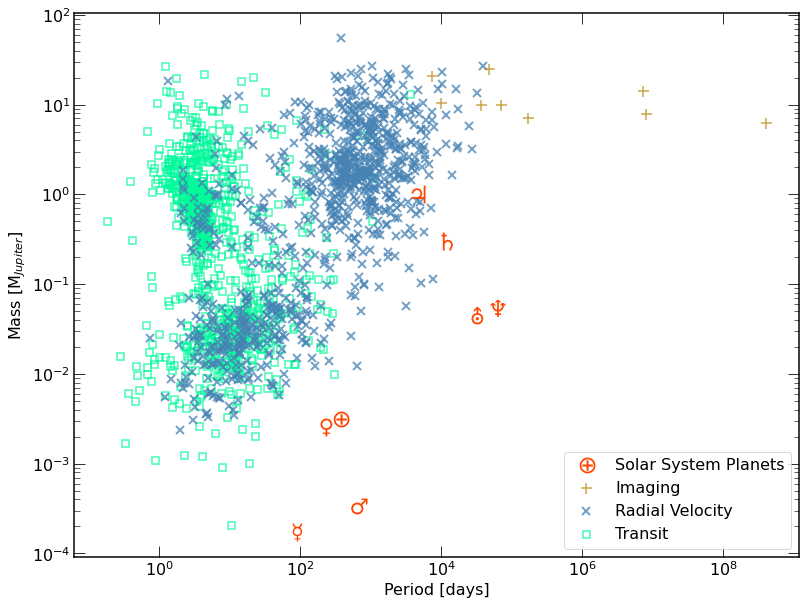

In [10]:
for method, dm in df.groupby('discoverymethod'):
    plt.plot(dm["pl_orbper"], dm["pl_bmassj"], ls="none", mfc="none", **mark[method], alpha=0.75, zorder=-len(dm))
for idx, pl in solsys.iterrows():
    plt.plot( pl.period_days, pl.mass_j, **mark[pl.pl_solsys], zorder=2)
solsys_label = mlines.Line2D([], [], linestyle='none', **mark["earth"], label='Solar System Planets')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")

# Get all the legend icons made by default
handles, labels = plt.gca().get_legend_handles_labels()
# Update legend to include custom icon alongside existing icons
plt.gca().legend(handles = [solsys_label] + handles, loc="lower right")

#plt.savefig( "figures/jup_mass_vs_orbital_per.pdf" )



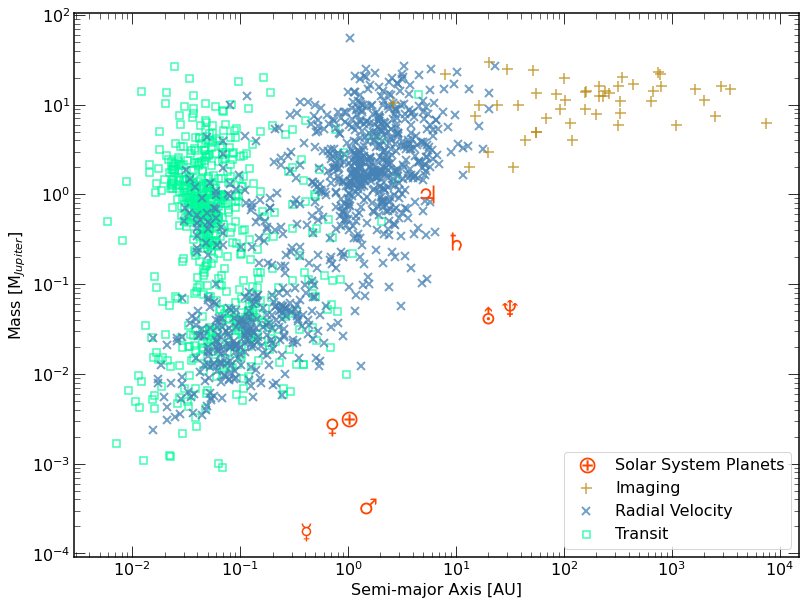

In [11]:
for method, dm in df.groupby('discoverymethod'):
    plt.plot(dm["pl_orbsmax"], dm["pl_bmassj"], ls="none", mfc="none", **mark[method], alpha=0.75, zorder=-len(dm))
for idx, pl in solsys.iterrows():
    plt.plot( pl.semi_ma, pl.mass_j, **mark[pl.pl_solsys], zorder=2)
solsys_label = mlines.Line2D([], [], linestyle='none', **mark["earth"], label='Solar System Planets')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [AU]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")

# Get all the legend icons made by default
handles, labels = plt.gca().get_legend_handles_labels()
# Update legend to include custom icon alongside existing icons
plt.gca().legend(handles = [solsys_label] + handles, loc="lower right")

#plt.savefig( "figures/jup_mass_vs_semi_ma.pdf" )

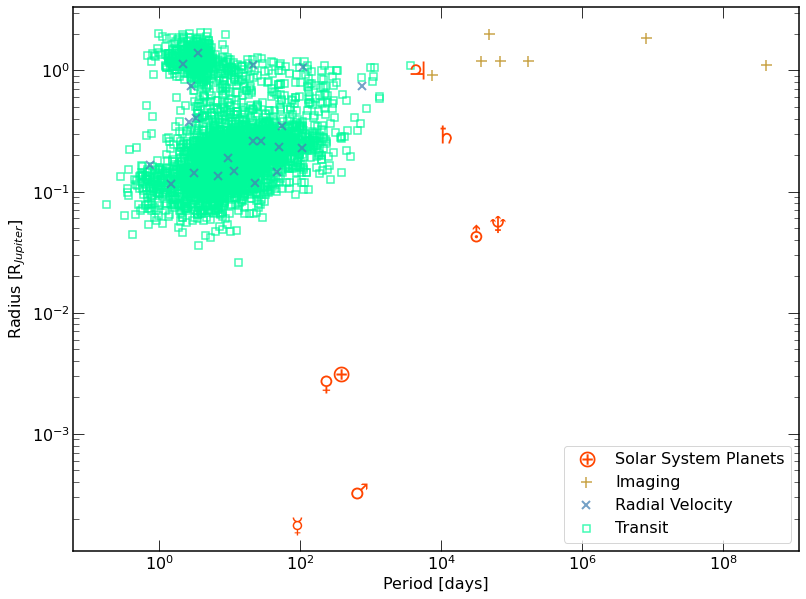

In [12]:
for method, dm in df.groupby('discoverymethod'):
    plt.plot(dm["pl_orbper"], dm["pl_radj"], ls="none", mfc="none", **mark[method], alpha=0.75, zorder=-len(dm))
for idx, pl in solsys.iterrows():
    plt.plot( pl.period_days, pl.rad_j, **mark[pl.pl_solsys], zorder=2)
solsys_label = mlines.Line2D([], [], linestyle='none', **mark["earth"], label='Solar System Planets')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")

# Get all the legend icons made by default
handles, labels = plt.gca().get_legend_handles_labels()
# Update legend to include custom icon alongside existing icons
plt.gca().legend(handles = [solsys_label] + handles, loc="lower right")

#plt.savefig( "figures/jup_rad_vs_orbital_per.pdf" )

In [71]:
# K2 12 ppm per 6 hours @ 6.3; https://arxiv.org/pdf/1511.07820.pdf
sensitivity = 1.2E-5 # 12 ppm

# flux_sensitivity_ratio = ( R_pl / R_star )^2
# R_pl = R_star * sqrt( flux_sensitivity_ratio )

# What is the minimum radius planet we can detect assuming:
#  -Solar radius star
#  -Sensitivity of 12ppm from K2
Rmin_jup = (1*u.solRad * sqrt(sensitivity)).to( u.jupiterRad )

print("Minimum Planet Size (R_Jupiter):", Rmin_jup)
print("Minimum Planet Size (R_Earth):", Rmin_jup.to(u.earthRad))

#Find transit probability of Jupiter
prob_jup = (1*u.solRad + 1*u.jupiterRad).to(u.AU)/ (5.2*u.AU)
print( "Probability of Detecting Jupiter around the Sun", prob_jup )

prob_min = (1*u.solRad + Rmin_jup).to(u.AU)/ (0.0058*u.AU)
print( "Probability of detecting the minimum planet around a sol-type star assuming minimum 'possible' semimajor", p )


semi_ma_arr = 10.0**(np.arange(5)-2) * u.AU

rad_arr = (semi_ma_arr * prob_min - 1*u.solRad).to(u.jupiterRad)
print(rad_arr[0])

Minimum Planet Size (R_Jupiter): 0.03370972267738119 jupiterRad
Minimum Planet Size (R_Earth): 0.3778516319360524 earthRad
Probability of Detecting Jupiter around the Sun 0.0009862234160591102
Probability of detecting the minimum planet around a sol-type star assuming minimum 'possible' semimajor 0.804582233122759
16.276276593342274 jupiterRad


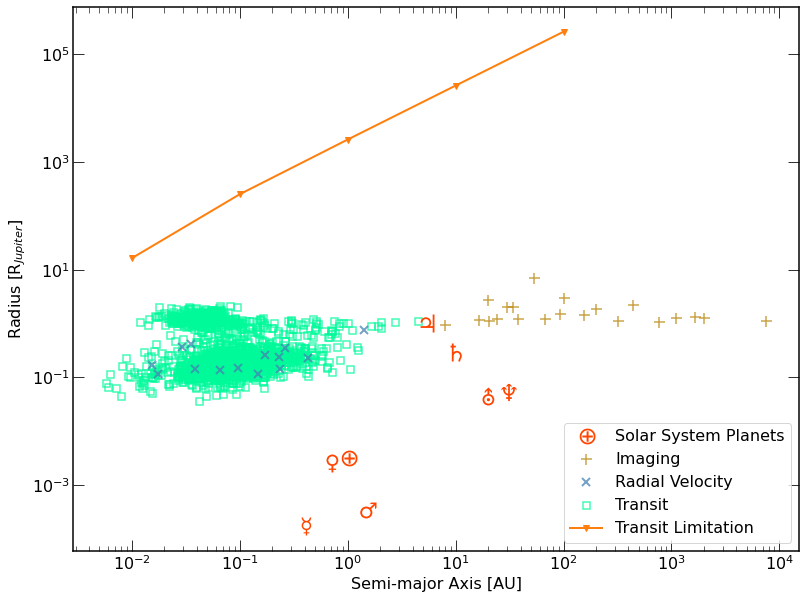

In [72]:
for method, dm in df.groupby('discoverymethod'):
    plt.plot(dm["pl_orbsmax"], dm["pl_radj"], ls="none", mfc="none", **mark[method], alpha=0.75, zorder=-len(dm))
for idx, pl in solsys.iterrows():
    plt.plot( pl.semi_ma, pl.rad_j, **mark[pl.pl_solsys], zorder=2)
solsys_label = mlines.Line2D([], [], linestyle='none', **mark["earth"], label='Solar System Planets')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [AU]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")

#plt.savefig( "figures/jup_rad_vs_semi_ma.pdf" )

#m_p_arr.decompose().to(u.earthMass)

plt.plot( semi_ma_arr, rad_arr, label="Transit Limitation" )

# Get all the legend icons made by default
handles, labels = plt.gca().get_legend_handles_labels()
# Update legend to include custom icon alongside existing icons
plt.gca().legend(handles = [solsys_label] + handles, loc="lower right")

For a sol size star, the ppm limitation is 